In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train_flat = x_train.reshape(x_train.shape[0], 28*28)
x_test_flat = x_test.reshape(x_test.shape[0], 28*28)


In [4]:
train_df = pd.DataFrame(x_train_flat)
train_df['label'] = y_train

NameError: name 'pd' is not defined

In [ ]:
train_df = train_df[['label'] + [col for col in train_df.columns if col != 'label']]


In [46]:
import numpy as np 
import pandas as pd

In [47]:
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('mnist.csv')

In [49]:
data.drop(columns = [data.columns[0]], inplace= True)

In [50]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape

In [52]:
def init_params(a,n_labels,x_size):
    w1 = np.random.randn(a,x_size) - 0.5
    b1 = np.random.randn(a,1) - 0.5
    w2 = np.random.randn(a,n_labels) - 0.5
    b2 = np.random.randn(n_labels,1) - 0.5
    
    return w1, b1, w2, b2

In [53]:
def init_param():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [54]:
def relu(z):
    return np.maximum(z,0)

def softmax(Z):
#     shift_x = x - np.max(x)
#     exp_x = np.exp(shift_x)
#     a = exp_x / np.sum(exp_x)
#     return a
    A = np.exp(Z) / sum(np.exp(Z))
    return A


In [55]:
def for_prop(x, w1,b1,w2,b2):
    z1 = w1.dot(x) + b1
    a1 = relu(z1)
    
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    
    return z1,a1,z2,a2

In [56]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max()+1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [57]:
def deriv_relu(z):
    return z>0

In [58]:
def back_prop(z1,a1,z2,a2,w1,w2,x,y):
    one_hot_y = one_hot(y)
    
    dz2 = a2 - one_hot_y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    
    dz1 = w2.T.dot(dz2) * deriv_relu(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m*np.sum(dz1)
    
    return dw1, db1, dw2, db2
    
    

In [59]:
# def hidden_layer():

In [60]:
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,lr):
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2

    return w1, b1, w2, b2

In [61]:
def get_pred(a2):
    return np.argmax(a2,0)

def get_acc(pred,y):
    return np.sum(y == pred)/y.size

In [62]:
np.unique(y_train).shape[0]

10

In [63]:
def grad_desc(x,y,epochs,lr):
    x_size = x.shape[0]
    n_labels = np.unique(y).shape[0]
    a = 10
    
    
    w1, b1, w2, b2 = init_param()
    
    for i in range(epochs):
        z1, a1, z2, a2 = for_prop(x, w1, b1, w2, b2)
        dw1, db1, dw2, db2 = back_prop(z1,a1,z2,a2,w1,w2,x,y)
        w1, b1, w2, b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,lr)
        
        print(f'Accuracy of {i}th iteration is {get_acc(get_pred(a2),y)}')
    
    return w1, b1, w2, b2
#     return x,get_pred(a2)

    

In [64]:
W1, b1, W2, b2 = grad_desc(x_train, y_train, 200, 0.2)

Accuracy of 0th iteration is 0.08070731707317073
Accuracy of 1th iteration is 0.12421951219512195
Accuracy of 2th iteration is 0.14302439024390243
Accuracy of 3th iteration is 0.16841463414634147
Accuracy of 4th iteration is 0.19351219512195122
Accuracy of 5th iteration is 0.21746341463414634
Accuracy of 6th iteration is 0.24129268292682926
Accuracy of 7th iteration is 0.2671219512195122
Accuracy of 8th iteration is 0.2909512195121951
Accuracy of 9th iteration is 0.31465853658536586
Accuracy of 10th iteration is 0.33563414634146344
Accuracy of 11th iteration is 0.3540243902439024
Accuracy of 12th iteration is 0.3714390243902439
Accuracy of 13th iteration is 0.38970731707317074
Accuracy of 14th iteration is 0.40724390243902436
Accuracy of 15th iteration is 0.4241951219512195
Accuracy of 16th iteration is 0.43826829268292683
Accuracy of 17th iteration is 0.4521707317073171
Accuracy of 18th iteration is 0.4646585365853659
Accuracy of 19th iteration is 0.47773170731707315
Accuracy of 20th 

Accuracy of 168th iteration is 0.8196341463414634
Accuracy of 169th iteration is 0.8232926829268292
Accuracy of 170th iteration is 0.8205365853658536
Accuracy of 171th iteration is 0.8243170731707317
Accuracy of 172th iteration is 0.8215853658536585
Accuracy of 173th iteration is 0.8253414634146341
Accuracy of 174th iteration is 0.8227317073170731
Accuracy of 175th iteration is 0.8261951219512195
Accuracy of 176th iteration is 0.8238048780487804
Accuracy of 177th iteration is 0.8271463414634146
Accuracy of 178th iteration is 0.8250975609756097
Accuracy of 179th iteration is 0.8278048780487804
Accuracy of 180th iteration is 0.826170731707317
Accuracy of 181th iteration is 0.8288780487804878
Accuracy of 182th iteration is 0.8271219512195122
Accuracy of 183th iteration is 0.8298536585365853
Accuracy of 184th iteration is 0.8279756097560975
Accuracy of 185th iteration is 0.8308536585365853
Accuracy of 186th iteration is 0.8291463414634146
Accuracy of 187th iteration is 0.8314634146341463
A

In [65]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, A2 = for_prop(x, w1, b1, w2, b2)
    predictions = get_pred(A2)
    return predictions

In [66]:
def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


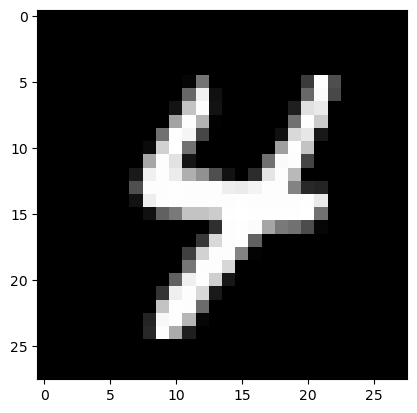

In [67]:
test_prediction(243, W1, b1, W2, b2)


In [ ]:
x[1].shape

In [ ]:
m,n = data.shape

In [ ]:
m,n